In [1]:
import pandas as pd

In [27]:
df=pd.read_csv(r'C:\Users\vedant\Downloads\Titanic-Dataset.csv')

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
import seaborn as sns

In [11]:
import matplotlib.pyplot as plt

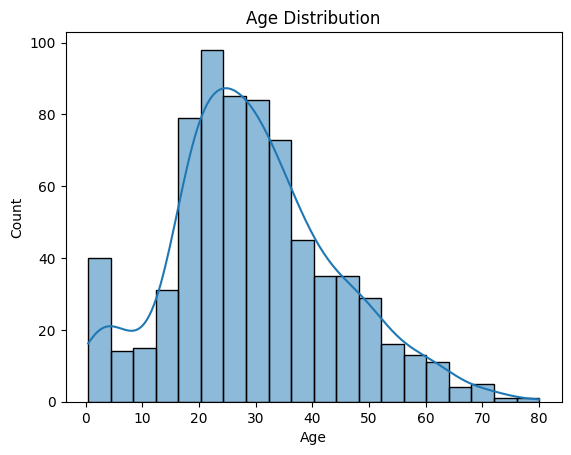

In [12]:
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

#### To find out if your numerical column (like Age ) is normally distributed (symmetric) or skewed (asymmetric), so you know:
#### Use mean for normal distribution
#### Use median for skewed distribution (outliers affect the mean)

#### check skewness numerically

In [13]:
print("Skewness of Age:", df['Age'].skew())

Skewness of Age: 0.38910778230082704


#### seems close to normal ,can use mean ,however median is safer for skewed distribution so we will use median.

In [25]:
import numpy as np

In [31]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [32]:
df['Age']= df['Age'].replace(np.nan, df['Age'].median)

In [33]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [35]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age             object
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [46]:
x= df['Age'].median()

In [47]:
x

28.0

In [48]:
df['Age']= df['Age'].replace(np.nan, x)

In [49]:
df['Age'].dtype

dtype('float64')

In [50]:
df['Age'].isnull().sum()

0

#### As 687 cabin values are missing ,we can either drop the column or fill the na values as 'Unknown'.We can derive a column 'deck' by taking first letter of the cabin values and for unknown values we can use 'U'for analysis.

In [51]:
df['Cabin'].replace(np.nan, 'Unknown',inplace=True)

C:\Users\vedant\AppData\Local\Temp\ipykernel_19840\1872604217.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].replace(np.nan, 'Unknown',inplace=True)


In [52]:
df['Cabin'].isnull().sum()

0

In [53]:
df['Deck']=df['Cabin'].str[0]

In [54]:
df['Deck'].isnull().sum()

0

#### Since only 2 values are missing in Embarked column. hence missing values can be filled with mode.

In [58]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [59]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [60]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Deck           0
dtype: int64

#### 'Sex' , 'Embarked' and 'Deck' columns are categorical which can be converted via encoding.
##### Used drop_first=True for sex column so that there is only one encoded column and kept the value as false for other columns.

In [61]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

In [62]:
df = pd.get_dummies(df, columns=['Embarked', 'Deck'], drop_first=False)

In [63]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E',
       'Deck_F', 'Deck_G', 'Deck_T', 'Deck_U'],
      dtype='object')

### Standardizing the values such that mean is 0 and std dev is 1.

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# List of numerical columns to scale
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']
df_scaled=df
# Fit and transform
df_scaled[num_cols] = scaler.fit_transform(df[num_cols])


#### Box Plots for Outliers

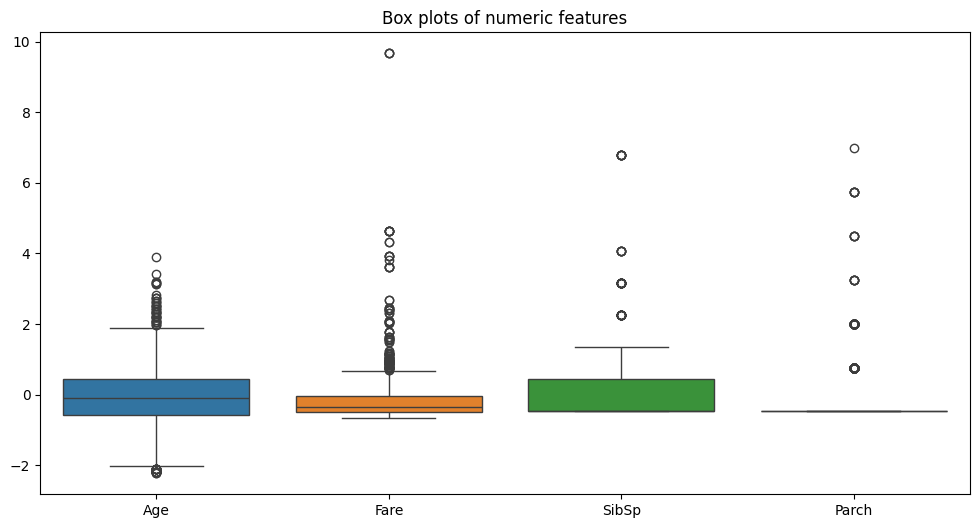

In [66]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_scaled[num_cols])
plt.title('Box plots of numeric features')
plt.show()

##### There are many outliers in case of Age ,Fare and for SibSp and Parch there are few outliers which can be meaningful .

In [69]:
def print_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    print(f"Outliers for column '{column}':")
    print(outliers[[column]])
    print(f"Total outliers: {len(outliers)}\n")

# Example usage:

print_outliers(df, 'SibSp')
print_outliers(df, 'Parch')


Outliers for column 'SibSp':
        SibSp
7    2.247470
16   3.154809
24   2.247470
27   2.247470
50   3.154809
59   4.062148
63   2.247470
68   3.154809
71   4.062148
85   2.247470
88   2.247470
119  3.154809
159  6.784163
164  3.154809
171  3.154809
176  2.247470
180  6.784163
182  3.154809
201  6.784163
229  2.247470
233  3.154809
261  3.154809
266  3.154809
278  3.154809
324  6.784163
341  2.247470
374  2.247470
386  4.062148
409  2.247470
480  4.062148
485  2.247470
541  3.154809
542  3.154809
634  2.247470
642  2.247470
683  4.062148
686  3.154809
726  2.247470
787  3.154809
792  6.784163
813  3.154809
819  2.247470
824  3.154809
846  6.784163
850  3.154809
863  6.784163
Total outliers: 46

Outliers for column 'Parch':
        Parch
7    0.767630
8    2.008933
10   0.767630
13   5.732844
16   0.767630
..        ...
871  0.767630
879  0.767630
880  0.767630
885  5.732844
888  2.008933

[213 rows x 1 columns]
Total outliers: 213

